### The spark Foundation - Graduate Rotational Internship Program
### Track : Data Science & Business Analytics
### Name : Ali Mostafa Ali
### Task4 : Exploratory Data Analysis - Terrorism
### Dataset URL : https://bit.ly/2TK5Xn5

# Step 1 - Import Data and Clean it

In [83]:
import numpy as np
import pandas as pd 
import matplotlib as plt 
import seaborn as sns

In [84]:
df=pd.read_csv('global_terrorism.csv',encoding='Latin-1')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [85]:
df.shape

(181691, 135)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [87]:
#to show all coloumns
pd.set_option('display.max_rows',None)
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [88]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [89]:
#piking out the important features and rename this features
important_features=['iyear','imonth','iday','country_txt','region_txt','provstate','latitude','longitude',
                   'summary','gname','weaptype1','attacktype1_txt','nwound','motive','targtype1_txt',
                    'target1','nkill','success']
df=df[important_features]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,summary,gname,weaptype1,attacktype1_txt,nwound,motive,targtype1_txt,target1,nkill,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,NaN,MANO-D,13,Assassination,0.0,NaN,Private Citizens & Property,Julio Guzman,1.0,1
1,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,NaN,23rd of September Communist League,13,Hostage Taking (Kidnapping),0.0,NaN,Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,NaN,Unknown,13,Assassination,0.0,NaN,Journalists & Media,Employee,1.0,1
3,1970,1,0,Greece,Western Europe,Attica,37.997490,23.762728,NaN,Unknown,6,Bombing/Explosion,NaN,NaN,Government (Diplomatic),U.S. Embassy,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Unknown,8,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),U.S. Consulate,NaN,1


In [64]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region'
                   ,'provstate':'State','summary':'Summary','gname':'Attacker_Group'
                   ,'weaptype1':'Weapon_type','attacktype1_txt':'Attack_type','nwound':'Wounded',
                   'motive':'Motive', 'targtype1_txt':'Target_type','target1':'Target','nkill':'Killed',
                   'success':'Succes'},inplace='True')

In [65]:
df.head()

,Year,Month,Day,Country,Region,State,latitude,longitude,Summary,Attacker_Group,Weapon_type,Attack_type,Wounded,Motive,Target_type,Target,Killed,Succes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,NaN,MANO-D,13,Assassination,0.0,NaN,Private Citizens & Property,Julio Guzman,1.0,1
1,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,NaN,23rd of September Communist League,13,Hostage Taking (Kidnapping),0.0,NaN,Government (Diplomatic),"Nadine Chaval, daughter",0.0,1
2,1970,1,0,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,NaN,Unknown,13,Assassination,0.0,NaN,Journalists & Media,Employee,1.0,1
3,1970,1,0,Greece,Western Europe,Attica,37.997490,23.762728,NaN,Unknown,6,Bombing/Explosion,NaN,NaN,Government (Diplomatic),U.S. Embassy,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Unknown,8,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),U.S. Consulate,NaN,1


In [66]:
df.shape

(181691, 18)

In [67]:
df.describe()

,Year,Month,Day,latitude,longitude,Weapon_type,Wounded,Killed,Succes
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,165380.000000,171378.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,6.447325,3.167668,2.403272,0.889598
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,2.173435,35.949392,11.545741,0.313391
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,5.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,6.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,6.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,13.000000,8191.000000,1570.000000,1.000000


In [74]:
#plot correlation between features
cor_=df.corr()

TypeError: 'module' object is not callable

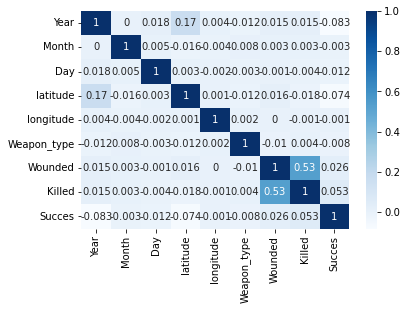

In [82]:
import seaborn as sns
sns.heatmap(np.round(cor_,3),annot=True,cmap='Blues')
plt.figure(figsize=(30,20))



# Step 2 - Data Visualization in PowerBi